Model Performance Comparison:

Linear Regression:
  MSE: 2900.19
  R² Score: 0.45

Ridge Regression:
  MSE: 2892.01
  R² Score: 0.45

Lasso Regression:
  MSE: 2884.62
  R² Score: 0.46

Random Forest:
  MSE: 2886.93
  R² Score: 0.46



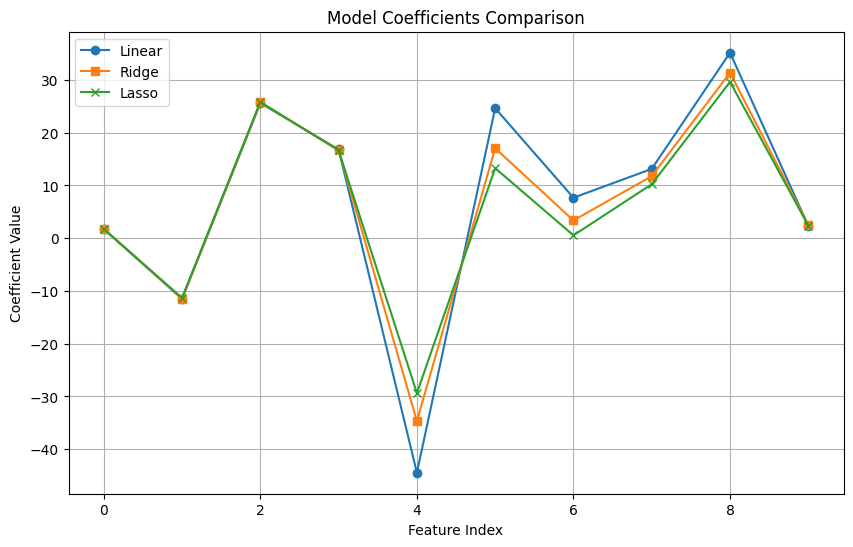

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for regularization methods
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 1. GridSearchCV - RandomForestRegressor
# ---------------------------
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# ---------------------------
# 2. Linear Regression (No Regularization)
# ---------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# ---------------------------
# 3. Ridge Regression (L2)
# ---------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# ---------------------------
# 4. Lasso Regression (L1)
# ---------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

# ---------------------------
# 5. Evaluate All Models
# ---------------------------
models = {
    "Linear Regression": (lr_pred, lr),
    "Ridge Regression": (ridge_pred, ridge),
    "Lasso Regression": (lasso_pred, lasso),
    "Random Forest": (rf_best.predict(X_test), rf_best)
}

print("Model Performance Comparison:\n")
for name, (y_pred, model) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R² Score: {r2:.2f}\n")

# ---------------------------
# 6. Plot Coefficients to Show Regularization Effect
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(lr.coef_, label='Linear', marker='o')
plt.plot(ridge.coef_, label='Ridge', marker='s')
plt.plot(lasso.coef_, label='Lasso', marker='x')
plt.title("Model Coefficients Comparison")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()